# VAE Tutorial
> Auto-Encoding Variational Bayes 정리글

- toc: true
- title: VAE Tutorial
- branch: master
- badges: true
- comments: true
- author: Wontak Ryu
- categories: [VAE, deeplearning]

# Auto-Encoding Variational Bayes
## Abstract

intractable한 posterior distribution의 random variable인 latent variable과 probabilitstic model이 주어졌을 때, 어떻게 효율적인 inference와 learning을 진행할 수 있을까?

해당 논문에서는 대형 데이터셋에도 적용가능한 stochastic variational inference와 learning 알고리즘을 제안한다.

이 논문의 contribution은 두 가지이다.
1. reparameterisztion of variational lower bound를 통해서 SGD를 사용하여 최적화할 수 있다.
2. 독립적인 데이터라는 가정하에서 lower bound estimator를 이용하여 poseterior inference(intractable)를 근사하여 구할 수 있다.


> probabilistic model과 대비되는 개념으로는 deterministic model이 있다. 일반적으로 output이 특정확률 분포에서 추출된 random variable이라고 가정한다.

**graph model**

![](https://2.bp.blogspot.com/-VnKSz_Ds8HI/WPV9J6d7CCI/AAAAAAAABno/oySdUuZJOS83tBdTnb00ADIK8G7IUrAvQCK4B/s400/vae_2.PNG "Directed Graphical Model")

위의 그림을 보면, 대략적인 구조를 알 수 있다. 우선, 실선은 generative model $p_{\theta}(Z)p_{\theta}(X \mid Z)$을 나타내며, 점선은 variational approximation $q_{\phi}(Z \mid X)$과정을 나타낸다. 


## Method

우선, 다음과 같은 가정을 하였다.

- i.i.d dataset with latent variables per datapoint

위와 같은 가정에서 global parameter 기반으로 MLE 혹은 MAP inference를 진행하고 latent variable으로 variational inference를 진행했다. global parameter에 variational inference를 진행해도 되지만, 해당 논문에서는 다루지 않았다.

### Problem scenario

i.i.d dataset $X = \{ x^{(i)} \}^N_{i=1}$ 은 관측되지 않고 연속적인 변수인 $z$에 생성된 것이라고 가정하고 이는 다음과 같은 과정을 통해서 이루어진다.

1. $z$는 prior distribution에서 생성된다. 

    $$z \sim p_{\theta *}(z)$$

2. 데이터는 조건부 확률을 통해서 생성된다.

    $$x^{(i)} \sim p_{\theta *}(x \mid z)$$

그리고, $p_{\theta *}(z)$와 $p_{\theta *}(x \mid z)$는 각각 미분가능한($\theta, z$에 대해서) PDF(확률밀도함수)를 가진 $p_{\theta}(z)$와 $p_{\theta}(x \mid z)$에서 출발했다고 가정한다.

중요한 점은 위의 과정에서는 marginal probability와 posterior probability에 대해서는 어떤 가정도 하지 않았다는 점이다. 이는 아래의 경우에서 보편적으로 사용할 수 있다는 뜻이다.

1. Intractability

    margianl likelihood $p_{\theta}(x) = \int p_{\theta}(z) p_{\theta}(x \mid z)$는 intractable하다. 일반적으로 neural network는 수많은 hidden layer로 이루어져있기 때문에 해당 liklihood$p_{\theta}(x \mid z)$는 intractable하다. 또한 이런 이유 때문에 unsupervised learning에서 사용되는 EM알고리즘은 사용하기 힘들다.

2. A large dataset

    Monte Carlo EM은 너무 느리다. 

결론적으로 해당 논문이 하고자 하는바는 다음과 같다.

1. Efficient approximate ML or MAP estimation for the paramters $\theta$

$$
p_{\theta}(x \mid z)
$$

2. Efficient approximate posterior inference of the latent variable z given an observed value x for a choice of parameters $\theta$

$$
p_{\theta}(z \mid x)
$$


3. Efficient approximate marginal inference of the variable X

$$
p_{\theta}(x) = \int p_{\theta}(x \mid z) p_{\theta}(z) dz
$$

위의 목적을 달성하기 위해서, recognition model $q_{\phi}(z \mid x)$를 사용하였다.

$$
q_{\phi}(z \mid x) \approx p_{\theta}(z \mid x)
$$

아래에는 $\theta, \phi$을 함께 학습시키는 방법을 소개할 것이다.



> mean-field variational inference
> 추후 작성 예정



$q_{\phi}(Z \mid X)$는 probabilistic encoder 역할을 하고 $p_{\theta}(X \mid Z)$는 probabilistic decoder의 역할을 한다.

![](https://datascienceschool.net/upfiles/f38b90fa89cb46eba22178edbae07a26.png)

### The variational bound

variational inference란, intractable한 posetrior분포 $p(z \mid x)$를 다루기 쉬운 확률분포 $q(z)$로 근사하는 것을 의미한다. intractable한 posterior를 직접다루지 않고, lower bound를 증가하는 방식으로 ${ D }_{ KL }\left( q\left( z \right) \mid \mid p\left( z \mid x \right)  \right)$를 감소시킬 수 있다.

$$
D_{\mathrm{KL}}(Q \parallel P) = \sum_\mathbf{Z}  Q(\mathbf{Z}) \left[ \log Q(\mathbf{Z}) -  \log P(\mathbf{Z},\mathbf{X}) \right] + \log P(\mathbf{X}) 
$$


$$
D_{\mathrm{KL}}(Q \parallel P) 
= \mathbb{E}_{\mathbf Z } \left[ \log Q(\mathbf{Z}) -  \log P(\mathbf{Z},\mathbf{X}) \right] + \log P(\mathbf{X}) 
$$


- marginal probability, 즉 사후확률의 분모인 $p(x)=Σzp(x,z)$를 계산하기 힘든 경우
- likelihood, 즉 $p(x \mid z)$를 더 복잡하게 모델링하고 싶은 경우
- prior, 즉 p(z)를 더 복잡하게 모델링하고 싶은 경우



전체 marginal likelihood는 각 data point들의 marginal likelihood의 합으로 구성된다.

$$
\log p_{\theta}(X^{(1)}, \cdots, X^{(N)} = \sum _{i=1}^N \log p_{\theta}(X^{(i)})
$$

그리고 각 data point의 marginal likelihood는 아래와 같이 구성된다.

$$
log p_{\theta}(X^{(i)}) = D_{KL}(q_{\phi}(Z \mid X^{(i)}) \mid \mid p_{\theta}(Z \mid X^{(i)})) + \mathcal{L}(\theta, \phi; X^{(i)})
$$

첫 번째 term인 $D_{KL}(q_{\phi}(Z \mid X^{(i)}) \mid \mid p_{\theta}(Z \mid X^{(i)}))$은 true posterior와 pred posterior간의 kl-divergence 값으로 non-negative하다는 성격을 가진다. 두 번째 term $\mathcal{L}(\theta, \phi; X^{(i)})$은 lower bound이며 다음과 같이 표현될 수 있다.


$$
log p_{\theta}(X^{(i)}) \ge \mathcal{L}(\theta, \phi; X^{(i)}) = \mathbb{E}_{q_{\phi}(Z \mid X)}[-\log q_{\phi}(z \mid x) + \log p_{\theta}(X)]
$$

$$
\mathcal{L}(\theta, \phi; X^{(i)}) = -D_{KL}(q_{\phi}(Z \mid X^{(i)}) \mid \mid p_{\theta}(Z )) + \mathbb{E}_{q_{\phi}(Z \mid X)}[\log p_{\theta}(X)]
$$

위의 형태는 $\mathcal{L}(\theta, \phi; X^{(i)})$를 미분하고 최적화를 variational parameters $\phi$와 generative parameters $\theta$에 대해서 할 수 있다. 하지만, $\phi$에 대해서 lower bound의 gradient를 구하는 것은 약간의 문제가 있다. 일반적인 Monte Carlo를 이용하게 되면, variance가 너무 높다는 한계가 있다.


### The SGVB estimator and AEVB algorithm

이 섹션에서는 효율적으로 lower bound와 lower bound의 parameter에 대한 미분을 구하는 것을 다룬다.

reparameterize를 통해서 $\tilde{z} \sim q_{\phi}(z \mid x)$를 다음과 같은 미분가능한 fuction의 형태로 바꿔줄 수 있다.

$$
\tilde{z} = g_{\phi}(\epsilon, X) \text{  with } \epsilon \sim p(\epsilon) 
$$

이를 통해서, Monte Carlo를 이용하여 $f(z)$ w.r.t $q_{\phi}(z \mid x)$의 기댓값을 구할 수 있다.


$$
\mathbb{E}_{q_{\phi}(z \mid x ^{(i)})}[f(z)] = \mathbb{E}_{p(\epsilon)}[f(g_{\phi}(\epsilon, X ^{(i)}))] = \frac{1}{L} \sum_{l=1}^L f(g_{\phi}(\epsilon^{(l)}, X ^{(i)})) \text{   where  } \epsilon^{(l)} \sim p(\epsilon)
$$

여기서, variational lower bound에 Monte Carlo Estimation을 적용하면 아래와 같이 전개된다. ($\mathcal{L}(\theta, \phi; X^{(i)}) = \mathbb{E}_{q_{\phi}(Z \mid X)}[-\log q_{\phi}(z \mid x) + \log p_{\theta}(X)]$)

**SGVB(stochastic gradient variational bayes) 1**

$$
\tilde{\mathcal{L}}^A(\theta, \phi; X^{(i)}) = \frac{1}{L} \sum_{l=1}^L \log p_{\theta}(X^{(i)}, Z^{(i, l)}) - \log q_{\phi}(Z^{(i, l)} \mid X^{(i)}) \text{    where   } Z^{(i, l)} = g_{\phi}(\epsilon^{(i, l)}, X^{(i)}), \ \ \epsilon^{(l)} \sim p(\epsilon)
$$


또한, kl-divergence term $D_{KL}(q_{\phi}(Z \mid X^{(i)}) \mid \mid p_{\theta}(Z))$은 적분될 수 있는데, 이는 해당논문의 appendix B를 참고하길 바란다.

kl-divergence는 $\phi$를 regularization한다고 해석할 수 있는데, approximate posterior가 prior $p_{\theta}(z)$를 근사하도록 한다.

이러한 관점을 바탕으로 아래와 같은 SGVB(stochastic gradient variational bayes)가 전개된다.


**SGVB(stochastic gradient variational bayes) 2**

sampling을 통해서 gradient estimate 방법보다 더 낮은 variance를 가진다. $\log p_{\theta}(x^{(i)}) \mid z^{(i, l)})$은 reconstruction error를 나타낸다.

$$
\tilde{\mathcal{L}}^B(\theta, \phi; X^{(i)}) = -D_{KL}(q_{\phi}(Z \mid X^{(i)}) \mid \mid p_{\theta}(Z)) + \frac{1}{L} \sum_{l=1}^L ( \log p_{\theta}(x^{(i)}) \mid z^{(i, l)})
\text{    where   } Z^{(i, l)} = g_{\phi}(\epsilon^{(i, l)}, X^{(i)}), \ \ \epsilon^{(l)} \sim p(\epsilon)
$$

- $\log p_{\theta}(x^{(i)}) \mid z^{(i, l)})$ 은 다음과 같은 관계를 가진다.

$$
p_{\theta}(x^{(i)}) \mid z^{(i, l)}) = p_{\theta}(x^{(i)}_1) \mid z^{(i, l)}) \times \cdots \times p_{\theta}(x^{(i)}_M) \mid z^{(i, l)}) 
$$

$$
\log p_{\theta}(x^{(i)}) \mid z^{(i, l)}) = \log p_{\theta}(x^{(i)}_1) \mid z^{(i, l)}) + \cdots + \log p_{\theta}(x^{(i)}_M) \mid z^{(i, l)}) 
$$


### The reparameterization trick

reparameterize를 통해서 $\tilde{z} \sim q_{\phi}(z \mid x)$를 다음과 같은 미분가능한 fuction의 형태로 바꿔줄 수 있다.

$$
\tilde{z} = g_{\phi}(\epsilon, X) \text{  with } \epsilon \sim p(\epsilon) 
$$

여기서 $\epsilon$은 auxiliary variable이며, 이를 통해서 $g_{\phi}(\cdot)$은 vector z를 도출한다.

reparameterization이 필요한 이유는 미분가능한 상태를 얻기 위해서이다. 아래는 증명이다.

$$
q_{\phi}(Z \mid X) dz = p(\epsilon) d\epsilon
$$

그러므로,


$$
\int q_{\phi}(Z \mid X) f(z) dz = \int p(\epsilon) f(Z) d\epsilon = \int p(\epsilon) f(g_{\phi}(\epsilon, X)) d\epsilon
$$

그리고, Monte Carlo Estimation을 고려하면,

$$
\int q_{\phi}(Z \mid X) f(z) dz \approx \frac{1}{L} \sum_{l=1}^Lf(g_{\phi}(\epsilon^{(l)}, X))
$$


**가우시안 분포를 예시로 살펴보자**

$$
z \sim p(z \mid x) = \mathcal{N}(u, \sigma^2)
$$

reparameterization을 적용하게 되면, 다음과 같이 생각할 수 있다.

$$
z = u + \sigma \epsilon \text{    where  } \epsilon \sim \mathcal{N}(0, 1)
$$

이를 바탕으로, 다음과 같은 수식전개가 가능하다.

$$
\mathbb{E}_{\mathcal{N}(z;u,\sigma^2)}[f(z)] = \mathbb{E}_{\mathcal{N}(\epsilon;0,1)}[f(u + \sigma \epsilon)] \approx \frac{1}{L} \sum_{l=1}^L f(u + \sigma \epsilon ^{(l)}) \text{   where  } \epsilon^{(l)} \sim \mathcal{N}(0,1)
$$

어떤 $q_{\phi}(z \mid x)$에대해 변환 함수 $g_{\phi}(\cdot)$과 $\epsilon \sim p(\epsilon)$을 사용하여 위와 같이 reparmeterization 할 수 있을지 살펴보자.

1. Tractable Inverse of CDF
2. Gaussian과 유사하게 location, scale 개념의 분포
3. random variables as different transformations
of auxiliary variables

위의 과정이 모두 실패하면, inverse of CDF를 근사하는 방식으로 접근할 수 있으며, time complexity는 PDF만큼 필요하다고 한다.


**inverse CDF**

아래와 같이 CDF가 정의된다면,

$$
F(X) = U \text{   where X is random variable}
$$

inverse CDF는 다음과 같이 정의될 수 있다.

$$
F^{-1}(U) = X \text{   where X is random variable}
$$

즉, $g_{\phi}(\cdot)$를 inverse CDF로 사용한다는 것은 $\epsilon$을 활용하여, 난수를 생성한다고 이해할 수 있다.


## Pytorch 구현체
- reference: https://github.com/GunhoChoi/PyTorch-FastCampus

### 1)  Import required libraries

In [0]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline


2) Set hyperparameters

In [0]:
batch_size = 128
learning_rate = 0.0005
num_epoch = 10
hidden_size = 50

### 3) Download Data

In [0]:
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


### 4) Set DataLoader

In [0]:
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

### 5) Model

In [0]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        self.fc1_1 = nn.Linear(784, hidden_size) # for mu
        self.fc1_2 = nn.Linear(784, hidden_size) # for logvar
        self.relu = nn.ReLU()
                        
    def encode(self,x):
        x = x.view(batch_size,-1)
        mu = self.relu(self.fc1_1(x))
        log_var = self.relu(self.fc1_2(x))
                
        return mu,log_var
    
    def reparametrize(self, mu, logvar):
        '''
        Transformation for differentiable function
        Return
            z = mu + std * eps
        '''
        std = logvar.mul(0.5).exp_()
        eps = torch.FloatTensor(std.size()).normal_()
        eps = Variable(eps).cuda()

        return eps.mul(std).add_(mu)
    
    def forward(self,x):
        mu, logvar = self.encode(x)
        reparam = self.reparametrize(mu,logvar)
        
        return mu,logvar,reparam

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        self.fc1 = nn.Linear(hidden_size, 784)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self,x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = out.view(batch_size,28,28,1)
        
        return out
                
encoder = Encoder().cuda()
decoder = Decoder().cuda()

### 6) Loss function & Optimizer

- Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
- https://arxiv.org/abs/1312.6114

$$
\tilde{\mathcal{L}}^B(\theta, \phi; X^{(i)}) = -D_{KL}(q_{\phi}(Z \mid X^{(i)}) \mid \mid p_{\theta}(Z)) + \frac{1}{L} \sum_{l=1}^L ( \log p_{\theta}(x^{(i)}) \mid z^{(i, l)})
\text{    where   } Z^{(i, l)} = g_{\phi}(\epsilon^{(i, l)}, X^{(i)}), \ \ \epsilon^{(l)} \sim p(\epsilon)
$$

From appendix B
$$
-D_{KL}(q_{\phi}(Z \mid X^{(i)}) \mid \mid p_{\theta}(Z)) = \frac{1}{2} \sum_{j=1}^J(1 + \log(\sigma_j^2) - u_j^2 -\sigma_j^2)
$$

In [0]:
reconstruction_function = nn.BCELoss(size_average=False) # 각 element들의 BCE loss를 모두 sum해야 kld scale과 일치한다.

def loss_function(recon_x, x, mu, logvar):
    BCE = reconstruction_function(recon_x, x) # reconstruction error

    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD_element = mu.pow(2).add_(logvar.exp()).mul_(-1).add_(1).add_(logvar)
    KLD = torch.sum(KLD_element).mul_(-0.5) # regularizer term

    return BCE + KLD

parameters = list(encoder.parameters())+ list(decoder.parameters())
optimizer = torch.optim.Adam(parameters, lr=learning_rate)

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


### 7) Train


--------model not restored--------



/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([128, 1, 28, 28])) that is different to the input size (torch.Size([128, 28, 28, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


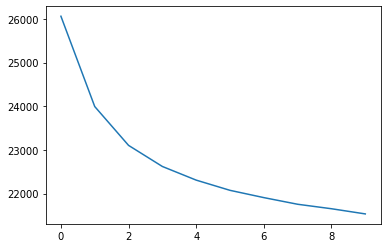

In [0]:
try:
    encoder, decoder = torch.load('./model/variational_autoencoder.pkl')
    print("\n--------model restored--------\n")
except:
    print("\n--------model not restored--------\n")
    pass

res = []

for i in range(num_epoch):
    cum_loss = 0
    for j,[image,label] in enumerate(train_loader):
        optimizer.zero_grad()
        
        image = Variable(image).cuda()
        mu,log_var,reparam = encoder(image)
        output = decoder(reparam)
        
        loss = loss_function(output, image, mu, log_var)
        cum_loss += loss
        loss.backward()
        optimizer.step()
    res.append(cum_loss / len(train_loader))

# Train graph
plt.plot(res)
plt.show()

### 8) Check with Train Image
아래의 이미지를 통해서 encoding된 train image가 decoding된 것을 확인할 수 있다.

torch.Size([128, 28, 28])


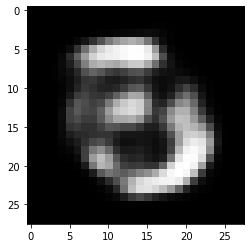

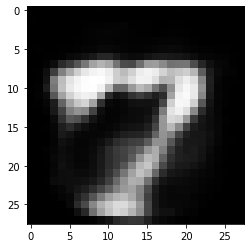

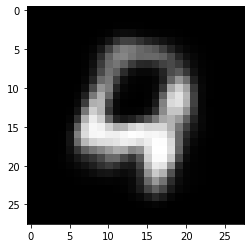

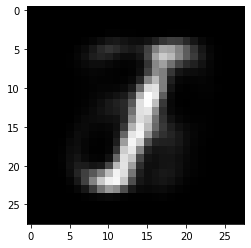

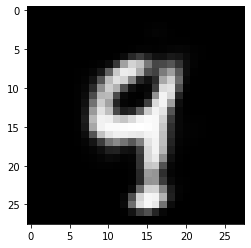

In [0]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(5):
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()

### 9) Check with Test image

In [0]:
for i in range(1):
    for j,[image,label] in enumerate(test_loader):       
        image = Variable(image,volatile=True).cuda()
        output,mean,var = encoder(image)
        output = decoder(output)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


torch.Size([128, 28, 28])


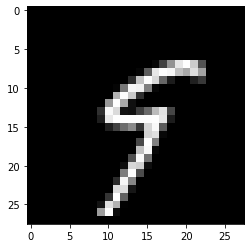

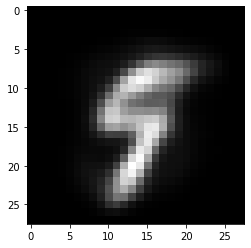

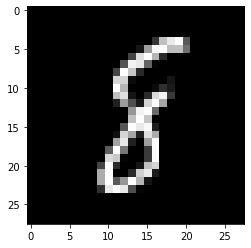

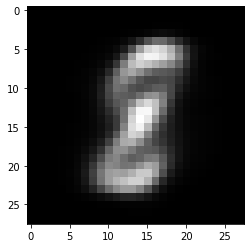

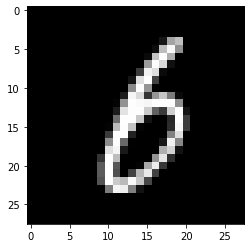

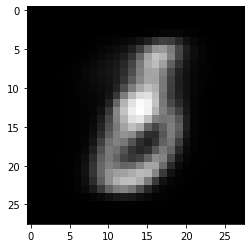

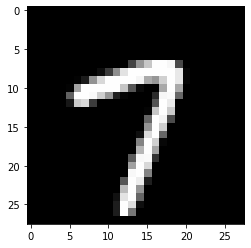

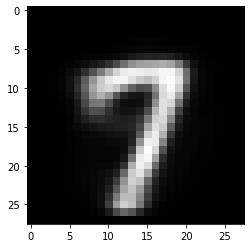

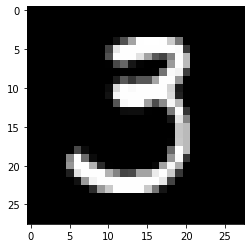

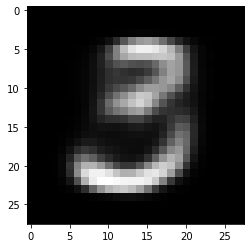

In [0]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(5):
    plt.imshow(torch.squeeze(image[i].cpu()).data.numpy(),cmap='gray')
    plt.show()
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()